## Notebook for performing NLP on the attachments (sam.gov) to test the limits of GFE 

In [26]:
# This cell performs NLP on PDF files contained in the specified directory to extract and analyze text data
# It will extract Keywords and their frequencies, Similar words for the most common keyword and Sentiment analysis scores for each page
# The final output is saved to 'results_sentiments.json' for further analysis
# Note: GFE was able to handle this NLP task without any issues

import os
import re
import json
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.sentiment import SentimentIntensityAnalyzer
from PyPDF2 import PdfReader

# Initialize the lemmatizer, stop words, and sentiment analyzer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
sentiment_analyzer = SentimentIntensityAnalyzer()

directory_path = "./downloads/pdfs"

def clean_token(token):
    return re.sub(r'[^a-zA-Z]', '', token).lower().strip()

results = []

# Iterate over PDF files in the specified directory
for filename in os.listdir(directory_path):
    if filename.endswith(".pdf"):
        print(f"Processing file: {filename}")
        with open(os.path.join(directory_path, filename), "rb") as pdf_file:
            pdf_reader = PdfReader(pdf_file)
            for page_number, page in enumerate(pdf_reader.pages, start=1):
                text = page.extract_text()
                if text:
                    tokens = word_tokenize(text)
                    tokens = [wrds for wrds in tokens if len(wrds) > 3]
                    tokens = [lemmatizer.lemmatize(clean_token(token)) for token in tokens if clean_token(token) and clean_token(token) not in stop_words]
                    keywords = nltk.FreqDist(tokens)
                    
                    # Collect the data for this page
                    page_data = {
                        'file': filename,
                        'page_number': page_number,
                        'keywords': {keyword: frequency for keyword, frequency in keywords.most_common(5)},
                        'similar_words': {},
                        'sentiment': {}
                    }

                    # Find similar words to the most common keyword
                    if keywords:
                        most_common_word = keywords.most_common(1)[0][0]
                        similar_words = wordnet.synsets(most_common_word)
                        similar_words = [lemma for syn in similar_words for lemma in syn.lemma_names()]
                        page_data['similar_words'][most_common_word] = similar_words

                        # Analyze the sentiment of the text
                        sentiment = sentiment_analyzer.polarity_scores(text)
                        page_data['sentiment'][most_common_word] = sentiment

                    # Add the page data to the results
                    results.append(page_data)
    
# Save the results to a JSON file
output_file = 'results_sentiments.json'
with open(output_file, 'w') as json_file:
    json.dump(results, json_file, indent=4)

print(f"Data has been saved to {output_file}")


Processing file: 1.JL-2672-110923Combined_1.29.24-compressed-v10-and-later.pdf
Processing file: 1.JL-2672-110923RFP_noMsnDes-1.29.24-compressed.pdf
Processing file: 10.1MarsHandbook2022-2040-compressed.pdf
Processing file: 2022.10.28RFI-2022-10-07-MartinQandA.pdf
Processing file: 36C25724Q0141A00002-CANCELATIONOFREQUIREMENT.pdf
Processing file: 6.1_BattellePNNLRFP746072.pdf
Processing file: 6.2_BattellePNNLRFP746072_SOW.pdf
Processing file: 6.3_RFP746072RepsCerts.pdf
Processing file: 6.4_BattellePNNLRFP746072_Hazard_Form.pdf
Processing file: 80JSC022R0004NOIS2RFPforOn-Ramping.pdf
Processing file: 80JSC022R0004NOIS2RFPforOn-Ramping__CoverLetter.pdf
Processing file: 80JSC022R0004NOIS2RFPforOn-Ramping__ModelContractGuide.pdf
Processing file: 80JSC022R0004NOIS2RFPforOn-Ramping__SF1449.pdf
Processing file: A01r6SurveyEquip2022purchasesinglesourcejustificationRedacted.pdf
Processing file: Attachment1-Specifications.pdf
Processing file: Attachment1A-DisplaySystemDrawing.pdf
Processing file: A

unknown widths : 
[0, IndirectObject(7464, 0, 920344080)]
unknown widths : 
[0, IndirectObject(7471, 0, 920344080)]
unknown widths : 
[0, IndirectObject(7475, 0, 920344080)]
unknown widths : 
[0, IndirectObject(7479, 0, 920344080)]
unknown widths : 
[0, IndirectObject(7483, 0, 920344080)]
unknown widths : 
[0, IndirectObject(7487, 0, 920344080)]
unknown widths : 
[0, IndirectObject(7491, 0, 920344080)]
unknown widths : 
[0, IndirectObject(7495, 0, 920344080)]
unknown widths : 
[0, IndirectObject(7504, 0, 920344080)]
unknown widths : 
[0, IndirectObject(7509, 0, 920344080)]
unknown widths : 
[0, IndirectObject(7513, 0, 920344080)]
unknown widths : 
[0, IndirectObject(7517, 0, 920344080)]
unknown widths : 
[0, IndirectObject(7521, 0, 920344080)]
unknown widths : 
[0, IndirectObject(7525, 0, 920344080)]
unknown widths : 
[0, IndirectObject(7529, 0, 920344080)]


Processing file: II_01_RFP_2032H8-24-R-00005P000025.17.24.pdf


unknown widths : 
[0, IndirectObject(607, 0, 920344080)]
unknown widths : 
[0, IndirectObject(610, 0, 920344080)]
unknown widths : 
[0, IndirectObject(613, 0, 920344080)]
unknown widths : 
[0, IndirectObject(616, 0, 920344080)]
unknown widths : 
[0, IndirectObject(619, 0, 920344080)]
unknown widths : 
[0, IndirectObject(622, 0, 920344080)]


Processing file: II_01_RFP_2032H8-R-24-00005GovernmentResponsestoQuestionsPart1(1).pdf
Processing file: IndustryDayQuestions_Set1.pdf
Processing file: IndustryDayQuestions_Set2.pdf
Processing file: LimitedSourcesJustificationforZero-HopConnectivity.pdf
Processing file: NOCDRDs.pdf
Processing file: NOCIIdRFPCommentDispositions_set1.pdf
Processing file: NOCIIdRFPCommentDispositions_Set2.pdf
Processing file: NOCIIIndustryDayCharts.pdf
Processing file: NOCIIInterestedPartiesList.pdf
Processing file: NOCSOW.pdf
Processing file: P03FAR13PharmacyRobotSingleSourceJustificationMPTSATCOBCSignedREDACT_Redacted.pdf
Processing file: PARTS.pdf
Processing file: Pre-ProposalConferenceRFP746072-Attendancereport5-25-23.pdf
Processing file: Pre-ProposalConf_RFP746072ProcurementProcess.pdf
Processing file: RFI-2022-10-07-MARTINR1.pdf
Processing file: RFI_DraftPWS_DAIMO.pdf
Processing file: RFQ246-24-Q-0112PHARMACISTSERVICES.pdf


unknown widths : 
[0, IndirectObject(1516, 0, 1061889104)]
unknown widths : 
[0, IndirectObject(1511, 0, 1061889104)]
unknown widths : 
[0, IndirectObject(1506, 0, 1061889104)]
unknown widths : 
[0, IndirectObject(1501, 0, 1061889104)]
unknown widths : 
[0, IndirectObject(1496, 0, 1061889104)]
unknown widths : 
[0, IndirectObject(1491, 0, 1061889104)]
unknown widths : 
[0, IndirectObject(1486, 0, 1061889104)]
unknown widths : 
[0, IndirectObject(1481, 0, 1061889104)]
unknown widths : 
[0, IndirectObject(1476, 0, 1061889104)]
unknown widths : 
[0, IndirectObject(1471, 0, 1061889104)]
unknown widths : 
[0, IndirectObject(1466, 0, 1061889104)]
unknown widths : 
[0, IndirectObject(1461, 0, 1061889104)]
unknown widths : 
[0, IndirectObject(1456, 0, 1061889104)]
unknown widths : 
[0, IndirectObject(1451, 0, 1061889104)]
unknown widths : 
[0, IndirectObject(1446, 0, 1061889104)]
unknown widths : 
[0, IndirectObject(1441, 0, 1061889104)]
unknown widths : 
[0, IndirectObject(1436, 0, 1061889104

Processing file: RFQ_140G0324Q0157.pdf
Processing file: SATPC0034982Tab044SOW.pdf
Processing file: SATPC0034982Tab07Capability.pdf
Processing file: SECTION_J.13._ATT._(13)_OASIS_SB_GSA_FORM_527_ON_RAMP_-_Amd_04.pdf
Processing file: SECTION_J.13_ATT_(13)_OASIS_SB_GSA_FORM_527_ON_RAMP.pdf
Processing file: SECTION_J.2._ATT._(2)_OASIS_DIRECT_LABOR_RANGES_-_Amd_04.pdf
Processing file: SECTION_J.2._ATT_(2)_OASIS_DIRECT_LABOR_RANGES.pdf
Processing file: SF1449.pdf
Processing file: SF30_GS00Q-13-DR-0002_OASIS_SB_P1P3P4_On-Ramp_Amd_0.pdf
Processing file: SF30_GS00Q-13-DR-0002_OASIS_SB_P1P3P4_On-Ramp_Amd_01.pdf
Processing file: SF30_GS00Q-13-DR-0002_OASIS_SB_P1P3P4_On-Ramp_Amd_02.pdf
Processing file: SF30_GS00Q-13-DR-0002_OASIS_SB_P1P3P4_On-Ramp_Amd_03.pdf
Processing file: SF30_GS00Q-13-DR-0002_OASIS_SB_P1P3P4_On-Ramp_Amd_04.pdf
Processing file: SF30_GS00Q-13-DR-0002_OASIS_SB_P1P3P4_On-Ramp_Amd_05.pdf
Processing file: SF30_GS00Q-13-DR-0002_OASIS_SB_P1P3P4_On-Ramp_Amd_06.pdf
Processing file: SF30

In [27]:
with open('results_sentiments.json', 'r') as json_file:
    data=json.load(json_file)
data[1]['sentiment']

{'service': {'neg': 0.04, 'neu': 0.878, 'pos': 0.082, 'compound': 0.959}}

In [28]:
# This cell performs text extraction, keyword analysis, and summarization on PDF documents.
# The final output is saved to 'results_summaries.json', which includes the keywords, their synonyms, and summaries for each keyword found in the PDFs.
# GFE was unable to handle this NLP task, simulation was interrupted at 98% usage. 

import os
import re
import json
from PyPDF2 import PdfReader
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from nltk.corpus import stopwords
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
import nltk

# # Ensure the necessary NLTK data files are downloaded
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('vader_lexicon')

def clean_token(token):
    return re.sub(r'[^a-zA-Z]', '', token).lower().strip()

directory_path = "./downloads/pdfs"

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to find keywords and similar words in a PDF document
def find_keywords(pdf_path):
    with open(pdf_path, "rb") as pdf_file:
        pdf_reader = PdfReader(pdf_file)
        keywords = defaultdict(list)
        # Iterate over each page of the PDF
        for page_number, page in enumerate(pdf_reader.pages, start=1):
            text = page.extract_text()
            if text:
                text = re.sub(r"[^\w\s]", "", text).lower()
                words = text.split()
                words = [lemmatizer.lemmatize(clean_token(word)) for word in words if clean_token(word) and clean_token(word) not in stop_words]
                for word in words:
                    keywords[word].append(text)
                    synonyms = [
                        synonym
                        for synset in wn.synsets(word)
                        for synonym in synset.lemma_names()
                    ]
                    for synonym in synonyms:
                        keywords[synonym].append(text)
    return keywords

# Function to create a summary for a document section
def create_summary(text):
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = LexRankSummarizer()
    summary = summarizer(parser.document, sentences_count=5)
    return "".join([str(sentence) for sentence in summary])

# Iterate over PDF files in the specified directory
results = defaultdict(dict)
for filename in os.listdir(directory_path):
    if filename.endswith(".pdf"):
        full_file_path = os.path.join(directory_path, filename)
        print(f"Processing file: {filename}")
        print(f"Full file path: {full_file_path}")
        keywords = find_keywords(full_file_path)
        results[filename]['keywords'] = keywords
        results[filename]['summaries'] = {}
        for keyword, texts in keywords.items():
            results[filename]['summaries'][keyword] = []
            for text in texts:
                summary = create_summary(text)
                results[filename]['summaries'][keyword].append(summary)
    
# Save the results to a JSON file
with open('results_summaries.json', 'w') as json_file:
    json.dump(results, json_file, indent=4)

print("Results have been saved to results.json")


Processing file: 1.JL-2672-110923Combined_1.29.24-compressed-v10-and-later.pdf
Full file path: ./downloads/pdfs\1.JL-2672-110923Combined_1.29.24-compressed-v10-and-later.pdf
Processing file: 1.JL-2672-110923RFP_noMsnDes-1.29.24-compressed.pdf
Full file path: ./downloads/pdfs\1.JL-2672-110923RFP_noMsnDes-1.29.24-compressed.pdf
Processing file: 10.1MarsHandbook2022-2040-compressed.pdf
Full file path: ./downloads/pdfs\10.1MarsHandbook2022-2040-compressed.pdf
Processing file: 2022.10.28RFI-2022-10-07-MartinQandA.pdf
Full file path: ./downloads/pdfs\2022.10.28RFI-2022-10-07-MartinQandA.pdf
Processing file: 36C25724Q0141A00002-CANCELATIONOFREQUIREMENT.pdf
Full file path: ./downloads/pdfs\36C25724Q0141A00002-CANCELATIONOFREQUIREMENT.pdf
Processing file: 6.1_BattellePNNLRFP746072.pdf
Full file path: ./downloads/pdfs\6.1_BattellePNNLRFP746072.pdf
Processing file: 6.2_BattellePNNLRFP746072_SOW.pdf
Full file path: ./downloads/pdfs\6.2_BattellePNNLRFP746072_SOW.pdf
Processing file: 6.3_RFP746072Re

KeyboardInterrupt: 

In [ ]:
with open('results_summaries.json', 'r') as json_file:
    data=json.load(json_file)
set(data['1.JL-2672-110923Combined_1.29.24-compressed-v10-and-later.pdf']['summaries']['jet'])

In [9]:
# function to display and count the total number of pages processed
import os
from PyPDF2 import PdfReader

def count_pages_in_pdfs(directory):
    total_pages=0

    for filename in os.listdir(directory):
        if filename.endswith(".pdf"):
            filepath = os.path.join(directory, filename)
            try:
                reader = PdfReader(filepath)
                num_pages = len(reader.pages)
                print(f"{filename}: {num_pages} pages")
                total_pages+=num_pages
            except Exception as e:
                print(f"Failed to read {filename}: {e}")
            print("     Total number of pages: ", total_pages)


directory_path = "./downloads/pdfs"

count_pages_in_pdfs(directory_path)


1.JL-2672-110923Combined_1.29.24-compressed-v10-and-later.pdf: 496 pages
     Total number of pages:  496
1.JL-2672-110923RFP_noMsnDes-1.29.24-compressed.pdf: 47 pages
     Total number of pages:  543
10.1MarsHandbook2022-2040-compressed.pdf: 449 pages
     Total number of pages:  992
2022.10.28RFI-2022-10-07-MartinQandA.pdf: 1 pages
     Total number of pages:  993
36C25724Q0141A00002-CANCELATIONOFREQUIREMENT.pdf: 2 pages
     Total number of pages:  995
6.1_BattellePNNLRFP746072.pdf: 26 pages
     Total number of pages:  1021
6.2_BattellePNNLRFP746072_SOW.pdf: 19 pages
     Total number of pages:  1040
6.3_RFP746072RepsCerts.pdf: 11 pages
     Total number of pages:  1051
6.4_BattellePNNLRFP746072_Hazard_Form.pdf: 1 pages
     Total number of pages:  1052
80JSC022R0004NOIS2RFPforOn-Ramping.pdf: 74 pages
     Total number of pages:  1126
80JSC022R0004NOIS2RFPforOn-Ramping__CoverLetter.pdf: 3 pages
     Total number of pages:  1129
80JSC022R0004NOIS2RFPforOn-Ramping__ModelContractGuide

## GFE reaches 97% of the memory at by reading the total pdf pages:  1655

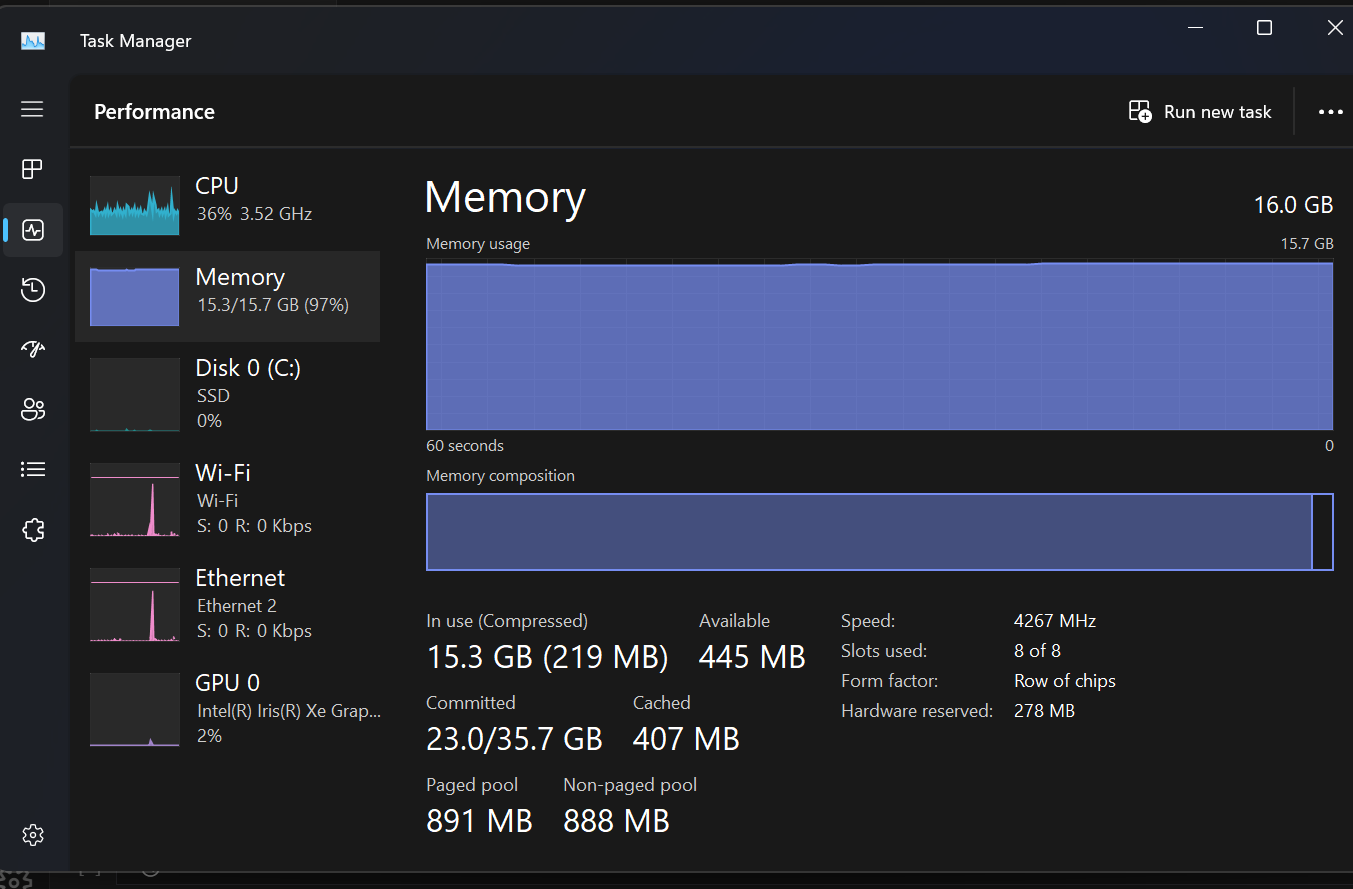